In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
"""

Original HED papr: https://arxiv.org/pdf/1504.06375.pdf

Caffe model is encoded into two files
1. Proto text file: https://github.com/s9xie/hed/blob/master/examples/hed/deploy.prototxt
2. Pretrained caffe model: http://vcl.ucsd.edu/hed/hed_pretrained_bsds.caffemodel
NOTE: In future, if these links do not work, I cannot help. Please Google
and find updated links (information current as of October 2022)


"""

import cv2
from matplotlib import pyplot as plt
import numpy as np

In [6]:
img = cv2.imread("/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/U_04_03.png")
print(img)  # This should not print 'None'


[[[168 192 222]
  [145 169 199]
  [164 188 218]
  ...
  [  7  13  12]
  [ 16  19  17]
  [ 17  23  22]]

 [[163 187 217]
  [150 174 204]
  [162 186 216]
  ...
  [  1   8   3]
  [  8  14   9]
  [ 13  20  17]]

 [[143 167 197]
  [153 177 207]
  [165 189 219]
  ...
  [ 32  43  41]
  [ 36  44  43]
  [ 35  47  47]]

 ...

 [[123 157 187]
  [138 172 201]
  [137 168 199]
  ...
  [ 86 123 161]
  [ 76 115 154]
  [ 62  99 137]]

 [[133 167 197]
  [129 164 190]
  [128 162 191]
  ...
  [ 89 126 164]
  [ 93 132 171]
  [ 90 127 165]]

 [[129 163 193]
  [126 163 189]
  [128 163 189]
  ...
  [ 50  87 125]
  [ 65 101 141]
  [ 74 111 149]]]


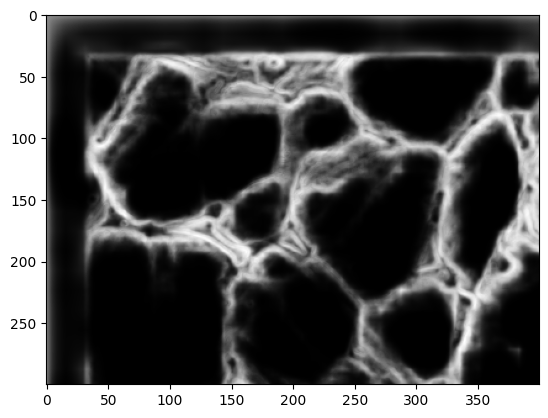

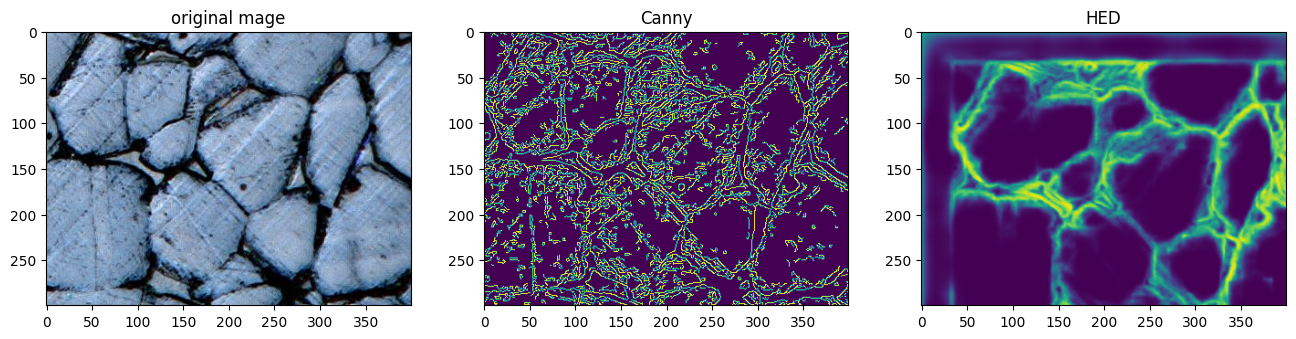

In [9]:

###########################################################
#Check traditional edge detectors first. e.g., canny, sobel, roberts, etc.

# load the input image and grab its dimensions, for future use while defining the blob
img = cv2.imread("/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/U_04_03.png")
plt.imshow(img)
#Canny
canny_edge = cv2.Canny(img,50,150)
plt.imshow(canny_edge)

#Autocanny
sigma = 0.3
median = np.median(img)

# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * median))
upper = int(min(255, (1.0 + sigma) * median))
auto_canny = cv2.Canny(img, lower, upper)
plt.imshow(auto_canny)


################################################################
"""
Steps for edge detection using HED:

1. Define the network and load the pre-trained model.​
2. Create blob from the image – basically create a preprocessed image​
3. Load pretrained model (you need both the proto text and caffe model files)​
4. Pass the blob image through model​ (forward pass)
5. Get output​


"""
# The pre-trained model that OpenCV uses has been trained in Caffe framework
#Download from the link above
protoPath = "/content/drive/MyDrive/Grain Boundary Detection/KaggleGrainDetection/archive/weights HED/deploy.prototxt"

modelPath = "/content/drive/MyDrive/Grain Boundary Detection/KaggleGrainDetection/archive/weights HED/hed_pretrained_bsds.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)


# load the input image and grab its dimensions, for future use while defining the blob
img = cv2.imread("/content/drive/MyDrive/Grain Boundary Detection/Stardist/DataCollection/U_04_03.png")
plt.imshow(img)
(H, W) = img.shape[:2]

# construct a blob out of the input image
#blob is basically preprocessed image.
#OpenCV’s new deep neural network (dnn ) module contains two functions that
#can be used for preprocessing images and preparing them for
#classification via pre-trained deep learning models.
# It includes scaling and mean subtraction
#How to calculate the mean?
mean_pixel_values= np.average(img, axis = (0,1))
blob = cv2.dnn.blobFromImage(img, scalefactor=0.7, size=(W, H),
                             #mean=(mean_pixel_values[0], mean_pixel_values[1], mean_pixel_values[2]),
                             mean=(105, 117, 123),
                             swapRB= False, crop=False)

#View image after preprocessing (blob)
blob_for_plot = np.moveaxis(blob[0,:,:,:], 0,2)
plt.imshow(blob_for_plot)


# set the blob as the input to the network and perform a forward pass
# to compute the edges
net.setInput(blob)
hed = net.forward()
hed = hed[0,0,:,:]  #Drop the other axes
#hed = cv2.resize(hed[0, 0], (W, H))
#hed = (255 * hed).astype("uint8")  #rescale to 0-255

plt.imshow(hed, cmap='gray')


plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.title("original mage")
plt.imshow(img)
plt.subplot(132)
plt.title("Canny")
plt.imshow(auto_canny)
plt.subplot(133)
plt.title("HED")
plt.imshow(hed)
